In [3]:
import talib
import importlib.metadata


TA-Lib version: 0.6.3
Pynance version: 1.0.0


In [7]:
import pandas as pd
df = pd.read_csv('data/AAPL_historical_data.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # invalid dates become NaT
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Optional: Keep only useful columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [10]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [11]:
import talib

# Moving Averages
df['MA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['MA_50'] = talib.SMA(df['Close'], timeperiod=50)

# RSI (Relative Strength Index)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# MACD (Moving Average Convergence Divergence)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

In [16]:
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

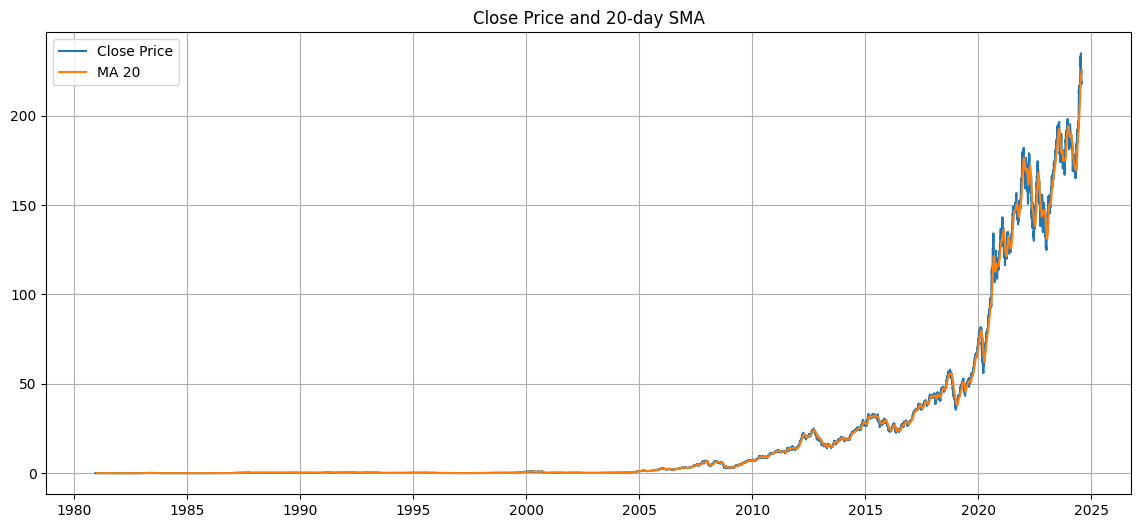

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_20'], label='MA 20')
plt.title('Close Price and 20-day SMA')
plt.legend()
plt.grid(True)
plt.show()

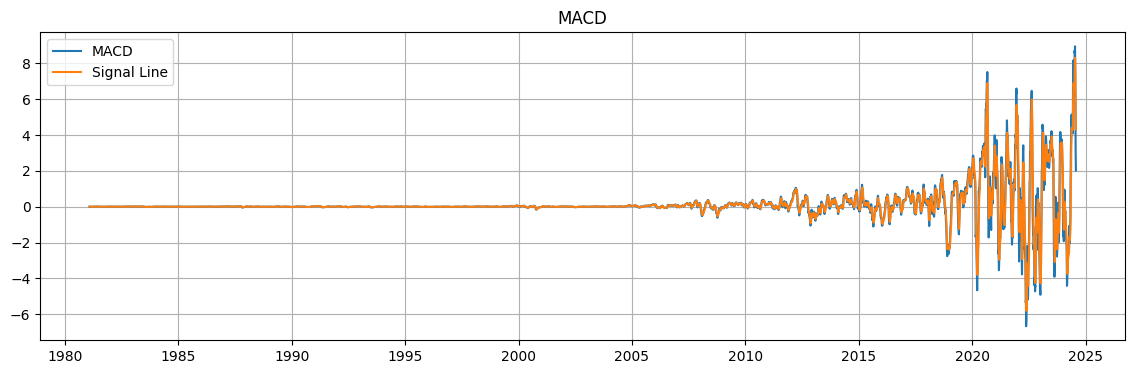

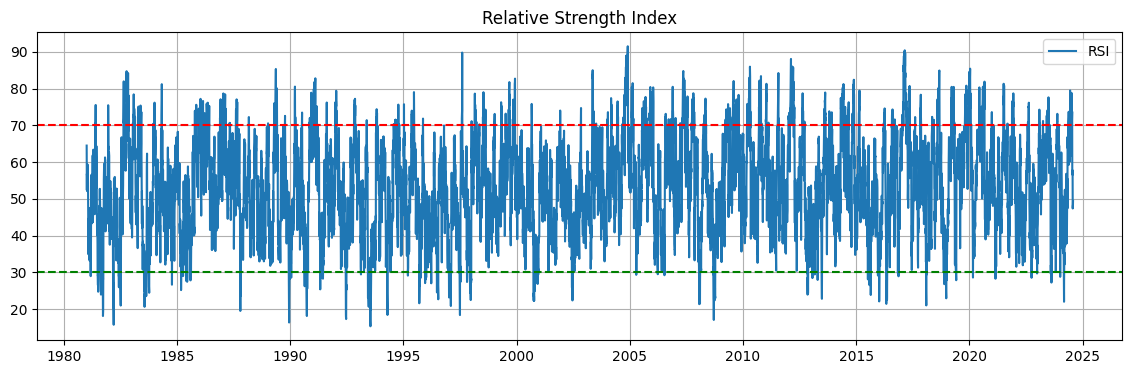

In [17]:
# MACD
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['MACD_signal'], label='Signal Line')
plt.title('MACD')
plt.legend()
plt.grid(True)
plt.show()

# RSI
plt.figure(figsize=(14, 4))
plt.plot(df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index')
plt.legend()
plt.grid(True)
plt.show()
